In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
# import re
import random
# import pickle
import data.datasets as dst


In [181]:
import sklearn as skl
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error

In [2]:
df = dst.getDataset("2023_03_21")

In [3]:
df

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,weekday,hour,name,lat,lon,capacity,occupation_prct,occupation_class
0,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:00:02,1,00:00:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
1,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:03:02,1,00:03:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
2,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:05:02,1,00:05:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
3,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:07:02,1,00:07:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
4,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:09:02,1,00:09:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030232,17451195211,0,0.0,0.0,0,0,0,0,1671722759,2023-03-21 23:50:46,1,23:50:46,Jean Bouin - Gouverneur Général Eboué,48.824793,2.265190,0,NaN,0
1030233,17451195211,0,0.0,0.0,0,0,0,0,1671722759,2023-03-21 23:52:46,1,23:52:46,Jean Bouin - Gouverneur Général Eboué,48.824793,2.265190,0,NaN,0
1030234,17451195211,0,0.0,0.0,0,0,0,0,1671722759,2023-03-21 23:54:46,1,23:54:46,Jean Bouin - Gouverneur Général Eboué,48.824793,2.265190,0,NaN,0
1030235,17451195211,0,0.0,0.0,0,0,0,0,1671722759,2023-03-21 23:56:46,1,23:56:46,Jean Bouin - Gouverneur Général Eboué,48.824793,2.265190,0,NaN,0


In [5]:
df["occupation_prct"].isna().value_counts()

False    1018812
True       11425
Name: occupation_prct, dtype: int64

In [6]:
df.dropna()

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,weekday,hour,name,lat,lon,capacity,occupation_prct,occupation_class
0,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:00:02,1,00:00:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
1,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:03:02,1,00:03:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
2,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:05:02,1,00:05:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
3,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:07:02,1,00:07:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
4,213688169,3,1.0,2.0,31,1,1,1,1679351605,2023-03-21 00:09:02,1,00:09:02,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,8.571429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029427,315022587,3,2.0,1.0,60,1,1,1,1679438055,2023-03-21 23:50:46,1,23:50:46,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,4.477612,0
1029428,315022587,3,2.0,1.0,60,1,1,1,1679438055,2023-03-21 23:52:46,1,23:52:46,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,4.477612,0
1029429,315022587,3,2.0,1.0,60,1,1,1,1679438055,2023-03-21 23:54:46,1,23:54:46,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,4.477612,0
1029430,315022587,3,2.0,1.0,60,1,1,1,1679438055,2023-03-21 23:56:46,1,23:56:46,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,4.477612,0


In [12]:
df[(df["is_installed"] == 1) & (df["capacity"] == 0)]

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,weekday,hour,name,lat,lon,capacity,occupation_prct,occupation_class
141600,129093478,0,0.0,0.0,0,1,0,0,1676589623,2023-03-21 00:00:02,1,00:00:02,Place de la Porte de Champerret,48.885617,2.290781,0,NaN,0
141601,129093478,0,0.0,0.0,0,1,0,0,1676589623,2023-03-21 00:03:02,1,00:03:02,Place de la Porte de Champerret,48.885617,2.290781,0,NaN,0
141602,129093478,0,0.0,0.0,0,1,0,0,1676589623,2023-03-21 00:05:02,1,00:05:02,Place de la Porte de Champerret,48.885617,2.290781,0,NaN,0
141603,129093478,0,0.0,0.0,0,1,0,0,1676589623,2023-03-21 00:07:02,1,00:07:02,Place de la Porte de Champerret,48.885617,2.290781,0,NaN,0
141604,129093478,0,0.0,0.0,0,1,0,0,1676589623,2023-03-21 00:09:02,1,00:09:02,Place de la Porte de Champerret,48.885617,2.290781,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780919,1064008882,0,0.0,0.0,0,1,0,0,1553093196,2023-03-21 23:50:46,1,23:50:46,Poulet - Barbès,48.887148,2.349064,0,NaN,0
780920,1064008882,0,0.0,0.0,0,1,0,0,1553093196,2023-03-21 23:52:46,1,23:52:46,Poulet - Barbès,48.887148,2.349064,0,NaN,0
780921,1064008882,0,0.0,0.0,0,1,0,0,1553093196,2023-03-21 23:54:46,1,23:54:46,Poulet - Barbès,48.887148,2.349064,0,NaN,0
780922,1064008882,0,0.0,0.0,0,1,0,0,1553093196,2023-03-21 23:56:46,1,23:56:46,Poulet - Barbès,48.887148,2.349064,0,NaN,0


In [17]:
df[df["capacity"] == 0].loc[::, ["station_id", "name", "is_installed", "is_returning", "is_renting"]].describe()

,station_id,is_installed,is_returning,is_renting
count,1.142500e+04,11425.000000,11425.0,11425.0
mean,8.805063e+09,0.495755,0.0,0.0
std,8.419683e+09,0.500004,0.0,0.0
min,7.619911e+07,0.000000,0.0,0.0
25%,2.370410e+08,0.000000,0.0,0.0
50%,1.637927e+10,0.000000,0.0,0.0
75%,1.727890e+10,1.000000,0.0,0.0
max,1.745120e+10,1.000000,0.0,0.0


In [18]:
df[df["capacity"] == 0].loc[::, ["station_id", "name", "is_installed", "is_returning", "is_renting"]].value_counts()

station_id   name                                   is_installed  is_returning  is_renting
76199110     Université Paris Dauphine              1             0             0             708
16379269732  Président Roosevelt - Rouget de Lisle  0             0             0             708
17364714962  Marseillaise - Grenade                 0             0             0             708
17364417797  Decrès - Alésia                        0             0             0             708
17278902806  Rouget de L'isle - Watteau             0             0             0             708
17225742003  Louis Armand - Bernard Palissy         0             0             0             708
17174675707  Saint Pères - Saint Germain            0             0             0             708
100905057    Londres - Amsterdam                    1             0             0             708
16898865154  Stéphanie Bouvard - Gambetta           0             0             0             708
1064008882   Poulet - Barbè

In [19]:
df2 = dst.getDataset("2023_03_20")

In [24]:
df = pd.concat([df, df2])

In [25]:
df[df["capacity"] == 0].loc[::, ["station_id", "name", "is_installed", "is_returning", "is_renting"]].value_counts()

station_id   name                                   is_installed  is_returning  is_renting
76199110     Université Paris Dauphine              1             0             0             1423
16379269732  Président Roosevelt - Rouget de Lisle  0             0             0             1423
17364714962  Marseillaise - Grenade                 0             0             0             1423
17364417797  Decrès - Alésia                        0             0             0             1423
17278902806  Rouget de L'isle - Watteau             0             0             0             1423
17225742003  Louis Armand - Bernard Palissy         0             0             0             1423
17174675707  Saint Pères - Saint Germain            0             0             0             1423
100905057    Londres - Amsterdam                    1             0             0             1423
16898865154  Stéphanie Bouvard - Gambetta           0             0             0             1423
1064008882   Poule

In [66]:
df1 = dst.getDataset("2023_03_18")
df2 = dst.getDataset("2023_03_19")
df3 = dst.getDataset("2023_03_20")
df4 = dst.getDataset("2023_03_21")

df1 = df1[df1["station_id"] == 1109534105]
df2 = df2[df2["station_id"] == 1109534105]
df3 = df3[df3["station_id"] == 1109534105]
df4 = df4[df4["station_id"] == 1109534105]

df = pd.concat([df1.iloc[0::1],df2.iloc[0::1],df3.iloc[0::1],df4.iloc[0::1]])
df = df.dropna(subset = ["station_id", "lat", "lon", "seconds_since_midnight", "occupation_prct", "occupation_class"])

In [68]:
# feat=['station_id', 'capacity', 'seconds_since_midnight']
feat = ["lat", "lon", "seconds_since_midnight"]
target = ["occupation_class"]

x = df[feat]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [69]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(x_train, y_train.values.ravel())

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [70]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.5498839907192575

In [71]:
print(feat)
clf.feature_importances_

['lat', 'lon', 'seconds_since_midnight']


array([0., 0., 1.])

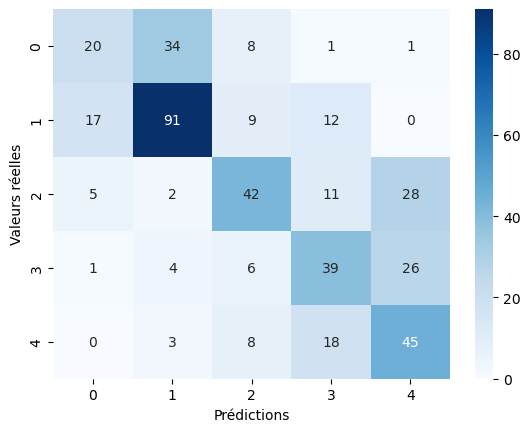

              precision    recall  f1-score   support

           0       0.47      0.31      0.37        64
           1       0.68      0.71      0.69       129
           2       0.58      0.48      0.52        88
           3       0.48      0.51      0.50        76
           4       0.45      0.61      0.52        74

    accuracy                           0.55       431
   macro avg       0.53      0.52      0.52       431
weighted avg       0.55      0.55      0.55       431



In [72]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()
print(classification_report(y_test,y_pred))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309669 entries, 0 to 1039600
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   station_id                309669 non-null  int64         
 1   num_bikes_available       309669 non-null  int64         
 2   num_bikes_available_mech  305497 non-null  float64       
 3   num_bikes_available_elec  305497 non-null  float64       
 4   num_docks_available       309669 non-null  int64         
 5   is_installed              309669 non-null  int64         
 6   is_returning              309669 non-null  int64         
 7   is_renting                309669 non-null  int64         
 8   last_reported             309669 non-null  int64         
 9   time                      309669 non-null  datetime64[ns]
 10  weekday                   309669 non-null  int64         
 11  hour                      309669 non-null  object        
 12  n

In [67]:
df[df["station_id"] == 13373801574]

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,weekday,hour,name,lat,lon,capacity,occupation_prct,occupation_class,seconds_since_midnight
495391,1109534105,13,2.0,11.0,7,1,1,1,1679091938,2023-03-18 00:00:53,5,00:00:53,Demi-Lune - Aristide Briand,48.876264,2.456282,20,65.0,2,53.0
495392,1109534105,13,2.0,11.0,7,1,1,1,1679091938,2023-03-18 00:02:53,5,00:02:53,Demi-Lune - Aristide Briand,48.876264,2.456282,20,65.0,2,173.0
495393,1109534105,13,2.0,11.0,7,1,1,1,1679091938,2023-03-18 00:04:54,5,00:04:54,Demi-Lune - Aristide Briand,48.876264,2.456282,20,65.0,2,294.0
495394,1109534105,13,2.0,11.0,7,1,1,1,1679091938,2023-03-18 00:06:54,5,00:06:54,Demi-Lune - Aristide Briand,48.876264,2.456282,20,65.0,2,414.0
495395,1109534105,13,2.0,11.0,7,1,1,1,1679091938,2023-03-18 00:08:54,5,00:08:54,Demi-Lune - Aristide Briand,48.876264,2.456282,20,65.0,2,534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493345,1109534105,20,2.0,18.0,0,1,1,1,1679351496,2023-03-20 23:49:01,0,23:49:01,Demi-Lune - Aristide Briand,48.876264,2.456282,20,100.0,4,85741.0
493346,1109534105,20,2.0,18.0,0,1,1,1,1679351496,2023-03-20 23:52:01,0,23:52:01,Demi-Lune - Aristide Briand,48.876264,2.456282,20,100.0,4,85921.0
493347,1109534105,20,2.0,18.0,0,1,1,1,1679351496,2023-03-20 23:54:01,0,23:54:01,Demi-Lune - Aristide Briand,48.876264,2.456282,20,100.0,4,86041.0
493348,1109534105,20,2.0,18.0,0,1,1,1,1679351496,2023-03-20 23:56:01,0,23:56:01,Demi-Lune - Aristide Briand,48.876264,2.456282,20,100.0,4,86161.0


In [78]:
dftest = dst.getDataset("2023_03_21")

dftest[dftest["station_id"] == 100863462]

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,weekday,hour,name,lat,lon,capacity,occupation_prct,occupation_class
981996,100863462,1,1.0,0.0,60,1,1,1,1679351592,2023-03-21 00:00:02,1,00:00:02,Musée d'Orsay,48.859726,2.32586,65,1.538462,0
981997,100863462,1,1.0,0.0,60,1,1,1,1679351592,2023-03-21 00:03:02,1,00:03:02,Musée d'Orsay,48.859726,2.32586,65,1.538462,0
981998,100863462,1,1.0,0.0,60,1,1,1,1679351592,2023-03-21 00:05:02,1,00:05:02,Musée d'Orsay,48.859726,2.32586,65,1.538462,0
981999,100863462,1,1.0,0.0,60,1,1,1,1679351592,2023-03-21 00:07:02,1,00:07:02,Musée d'Orsay,48.859726,2.32586,65,1.538462,0
982000,100863462,2,1.0,1.0,59,1,1,1,1679351592,2023-03-21 00:09:02,1,00:09:02,Musée d'Orsay,48.859726,2.32586,65,3.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982699,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:50:46,1,23:50:46,Musée d'Orsay,48.859726,2.32586,65,1.538462,0
982700,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:52:46,1,23:52:46,Musée d'Orsay,48.859726,2.32586,65,1.538462,0
982701,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:54:46,1,23:54:46,Musée d'Orsay,48.859726,2.32586,65,1.538462,0
982702,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:56:46,1,23:56:46,Musée d'Orsay,48.859726,2.32586,65,1.538462,0


In [88]:
dftest = dst.getDataset("2023_03_20")

dftest

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,weekday,hour,name,lat,lon,capacity,occupation_prct,occupation_class,seconds_since_midnight
0,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:00:18,0,00:00:18,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,1,18
1,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:02:17,0,00:02:17,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,1,137
2,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:04:18,0,00:04:18,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,1,258
3,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:06:17,0,00:06:17,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,1,377
4,213688169,5,2.0,3.0,30,1,1,1,1679264946,2023-03-20 00:08:18,0,00:08:18,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,14.285714,1,498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039605,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:49:01,0,23:49:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,0,85741
1039606,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:52:01,0,23:52:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,0,85921
1039607,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:54:01,0,23:54:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,0,86041
1039608,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:56:01,0,23:56:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,0,86161


In [89]:
dftest['heure'] = dftest["time"].dt.hour
dftest['jour'] = dftest["time"].dt.day
dftest['minute'] = dftest["time"].dt.minute

In [90]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039610 entries, 0 to 1039609
Data columns (total 22 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   station_id                1039610 non-null  int64         
 1   num_bikes_available       1039610 non-null  int64         
 2   num_bikes_available_mech  1035248 non-null  float64       
 3   num_bikes_available_elec  1035248 non-null  float64       
 4   num_docks_available       1039610 non-null  int64         
 5   is_installed              1039610 non-null  int64         
 6   is_returning              1039610 non-null  int64         
 7   is_renting                1039610 non-null  int64         
 8   last_reported             1039610 non-null  int64         
 9   time                      1039610 non-null  datetime64[ns]
 10  weekday                   1039610 non-null  int64         
 11  hour                      1039610 non-null  object

In [97]:
DF0 = dst.getDataset("2023_03_17")
DF1 = dst.getDataset("2023_03_18")
DF2 = dst.getDataset("2023_03_19")
DF3 = dst.getDataset("2023_03_20")
DF4 = dst.getDataset("2023_03_21")

In [119]:
def getDatasetStation(station_id: int) -> object:    
    return pd.concat([
        DF0[DF0["station_id"] == station_id],
        DF1[DF1["station_id"] == station_id],
        DF2[DF2["station_id"] == station_id],
        DF3[DF3["station_id"] == station_id],
        DF4[DF4["station_id"] == station_id],
    ])

def getAllStations(step: int) -> object:    
    return pd.concat([
        DF0.iloc[0::step],
        DF1.iloc[0::step],
        DF2.iloc[0::step],
        DF3.iloc[0::step],
        DF4.iloc[0::step],
    ])

In [101]:
def preProcessDataframe(df: object) -> object:
    dfret = df.dropna(subset = [
        "station_id", 
        "lat", 
        "lon", 
        "occupation_prct", 
        "occupation_class"
    ])
    
    dfret['jour'] = dfret["time"].dt.day
    dfret['heure'] = dfret["time"].dt.hour
    dfret['minute'] = dfret["time"].dt.minute
    
    return dfret

In [102]:
preProcessDataframe(getDatasetStation(100863462))

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,...,name,lat,lon,capacity,occupation_prct,occupation_class,seconds_since_midnight,jour,heure,minute
295431,100863462,32,23.0,9.0,26,1,1,1,1679066643,2023-03-17 16:30:22,...,Musée d'Orsay,48.859726,2.32586,65,49.230769,2,59422.0,17,16,30
295432,100863462,30,22.0,8.0,28,1,1,1,1679066643,2023-03-17 16:34:22,...,Musée d'Orsay,48.859726,2.32586,65,46.153846,2,59662.0,17,16,34
295433,100863462,28,23.0,5.0,30,1,1,1,1679066643,2023-03-17 16:57:24,...,Musée d'Orsay,48.859726,2.32586,65,43.076923,2,61044.0,17,16,57
295434,100863462,28,23.0,5.0,30,1,1,1,1679066643,2023-03-17 16:59:24,...,Musée d'Orsay,48.859726,2.32586,65,43.076923,2,61164.0,17,16,59
295435,100863462,27,22.0,5.0,31,1,1,1,1679066643,2023-03-17 17:01:24,...,Musée d'Orsay,48.859726,2.32586,65,41.538462,2,61284.0,17,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982699,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:50:46,...,Musée d'Orsay,48.859726,2.32586,65,1.538462,0,NaN,21,23,50
982700,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:52:46,...,Musée d'Orsay,48.859726,2.32586,65,1.538462,0,NaN,21,23,52
982701,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:54:46,...,Musée d'Orsay,48.859726,2.32586,65,1.538462,0,NaN,21,23,54
982702,100863462,1,1.0,0.0,58,1,1,1,1679438002,2023-03-21 23:56:46,...,Musée d'Orsay,48.859726,2.32586,65,1.538462,0,NaN,21,23,56


In [130]:
def testClassifier(df: object) -> None:

    # feat=['station_id', 'capacity', 'seconds_since_midnight']
    feat = ["station_id", "lon", "lat", "jour", "heure", "minute"]
    target = ["occupation_class"]

    x = df[feat]
    y = df[target]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(x_train, y_train.values.ravel())

    y_pred = clf.predict(x_test)
    accuracy_score(y_test, y_pred)

    print(feat)
    print(clf.feature_importances_)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs réelles')
    plt.show()
    print(classification_report(y_test,y_pred))

['station_id', 'lon', 'lat', 'jour', 'heure', 'minute']
[0.         0.         0.         0.17288175 0.80166811 0.02545014]


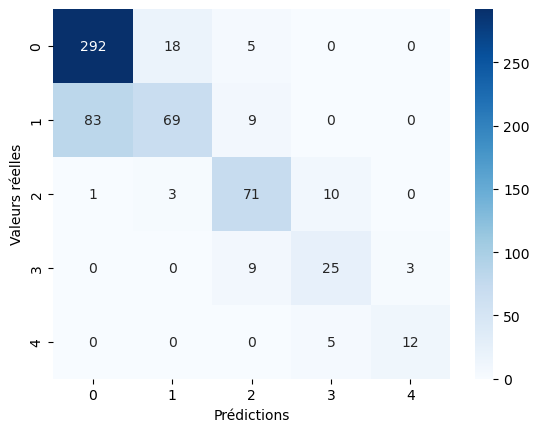

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       315
           1       0.77      0.43      0.55       161
           2       0.76      0.84      0.79        85
           3       0.62      0.68      0.65        37
           4       0.80      0.71      0.75        17

    accuracy                           0.76       615
   macro avg       0.74      0.71      0.72       615
weighted avg       0.76      0.76      0.75       615



In [131]:
testClassifier(preProcessDataframe(getDatasetStation(128932790)))

/tmp/ipykernel_7280/335657735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfret['jour'] = dfret["time"].dt.day
/tmp/ipykernel_7280/335657735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfret['heure'] = dfret["time"].dt.hour
/tmp/ipykernel_7280/335657735.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

['station_id', 'lon', 'lat', 'jour', 'heure', 'minute']
[0.02522222 0.06502196 0.88804647 0.00373928 0.01797007 0.        ]


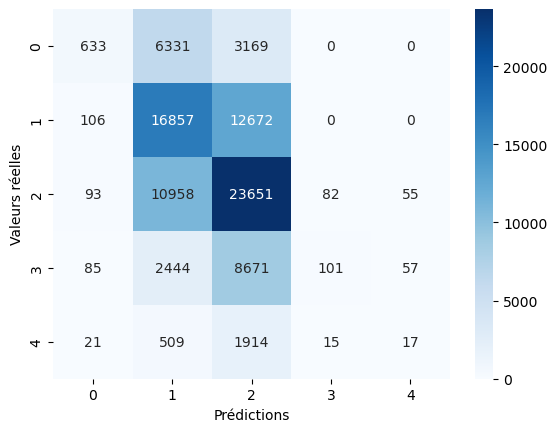

              precision    recall  f1-score   support

           0       0.67      0.06      0.11     10133
           1       0.45      0.57      0.51     29635
           2       0.47      0.68      0.56     34839
           3       0.51      0.01      0.02     11358
           4       0.13      0.01      0.01      2476

    accuracy                           0.47     88441
   macro avg       0.45      0.27      0.24     88441
weighted avg       0.48      0.47      0.40     88441



In [116]:
testClassifier(preProcessDataframe(getAllStations(10)))

['Bois de Vincennes - Gare']
['station_id', 'lon', 'lat', 'jour', 'heure', 'minute']
[0.         0.         0.         0.32646695 0.66395275 0.00958031]


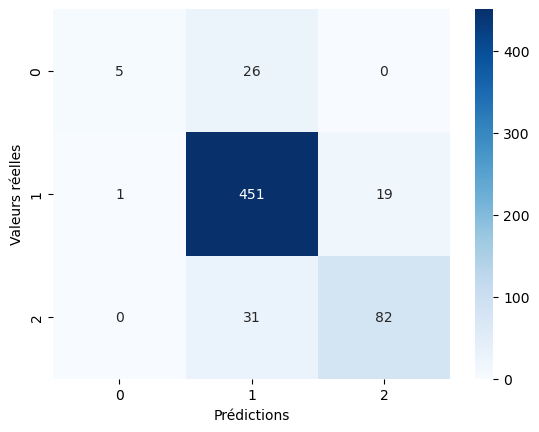

              precision    recall  f1-score   support

           0       0.83      0.16      0.27        31
           1       0.89      0.96      0.92       471
           2       0.81      0.73      0.77       113

    accuracy                           0.87       615
   macro avg       0.84      0.61      0.65       615
weighted avg       0.87      0.87      0.86       615



In [133]:
for sample in random.sample(list(DF0["station_id"].unique()), 1):
    print(DF0[DF0["station_id"] == sample]["name"].unique())
    testClassifier(preProcessDataframe(getDatasetStation(sample)))

In [204]:
def testRegressor(df: object) -> None:

    # feat=['station_id', 'capacity', 'seconds_since_midnight']
    
    """
        Utiliser l'horizon d'une journée pour plus tard
        
        horizon = 720

        feat = ["station_id", "lon", "lat", "jour", "heure", "minute"]
        target = ["occupation_prct"]

        x = test[feat]
        y = test[target]
        horizon = 720
        x_train, x_test = x.iloc[:-horizon,:], x.iloc[-horizon:,:]
        y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
    """
    
    dfbis = df.set_index("time")
    feat = ["station_id", "lon", "lat", "jour", "heure", "minute"]
    target = ["occupation_prct"]

    x = dfbis[feat]
    y = dfbis[target]
    
    # Méthode classique
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    horizon = 720
    x_train, x_test = x.iloc[:-horizon,:], x.iloc[-horizon:,:]
    y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

    x_train = x_train.sort_index()
    y_train = y_train.sort_index()
    x_test = x_test.sort_index()
    y_test = y_test.sort_index()

    clf = GradientBoostingRegressor(random_state=0)
    clf.fit(x_train, y_train.values.ravel())

    y_pred = clf.predict(x_test)
    
    mae = np.round(mean_absolute_error(y_test, y_pred), 3)
    
    #plot reality vs prediction for the last week of the dataset
    fig = plt.figure(figsize=(16,6))
    plt.title(f'Real vs Prediction - MAE {mae}', fontsize=20)
    plt.plot(y_test, color='red')
    plt.plot(pd.Series(y_pred, index = y_test.index), color='green')
    plt.xlabel('Hour', fontsize = 16)
    plt.ylabel('Occupation Prct', fontsize = 16)
    plt.legend(labels=['Real', 'Prediction'], fontsize = 16)
    plt.grid()
    plt.show()
    
    #create a dataframe with the variable importances of the model
    df_importances = pd.DataFrame({
        'feature': clf.feature_names_in_,
        'importance': clf.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    #plot variable importances of the model
    plt.title('Variable Importances', fontsize=16)
    sns.barplot(x = df_importances.importance, y = df_importances.feature, orient='h')
    plt.show()

['Place des Victoires']


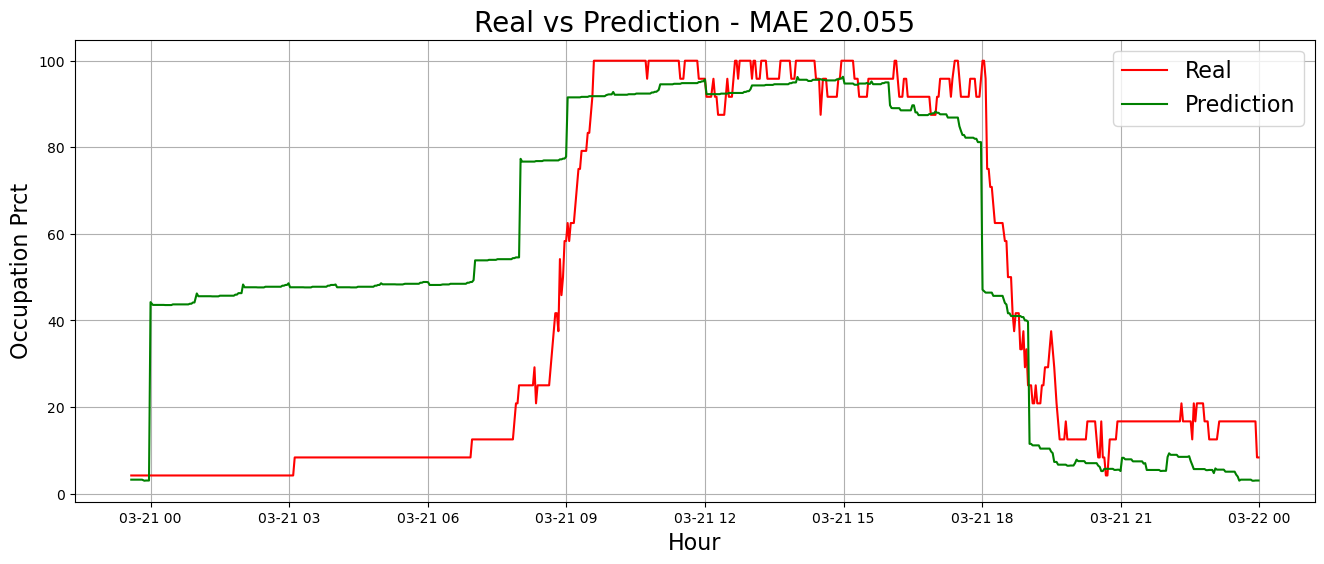

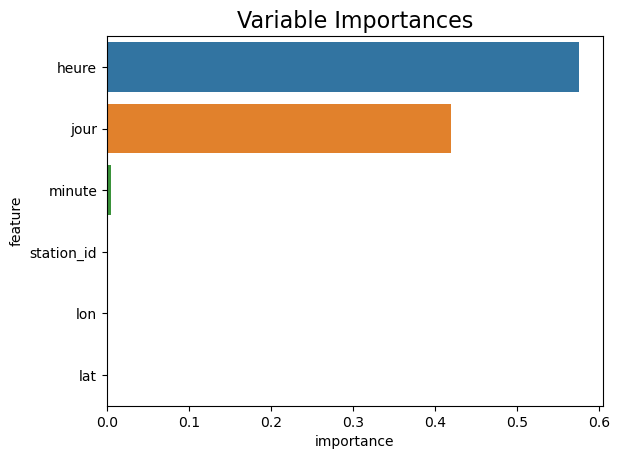

In [205]:
for sample in random.sample(list(DF0["station_id"].unique()), 1):
    print(DF0[DF0["station_id"] == sample]["name"].unique())
    testRegressor(preProcessDataframe(getDatasetStation(sample)))

/tmp/ipykernel_7280/2049642192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samedi["time"] = samedi['time'].apply(lambda dt: dt.replace(day = 21))
/tmp/ipykernel_7280/2049642192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimanche["time"] = dimanche['time'].apply(lambda dt: dt.replace(day = 21))
/tmp/ipykernel_7280/2049642192.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

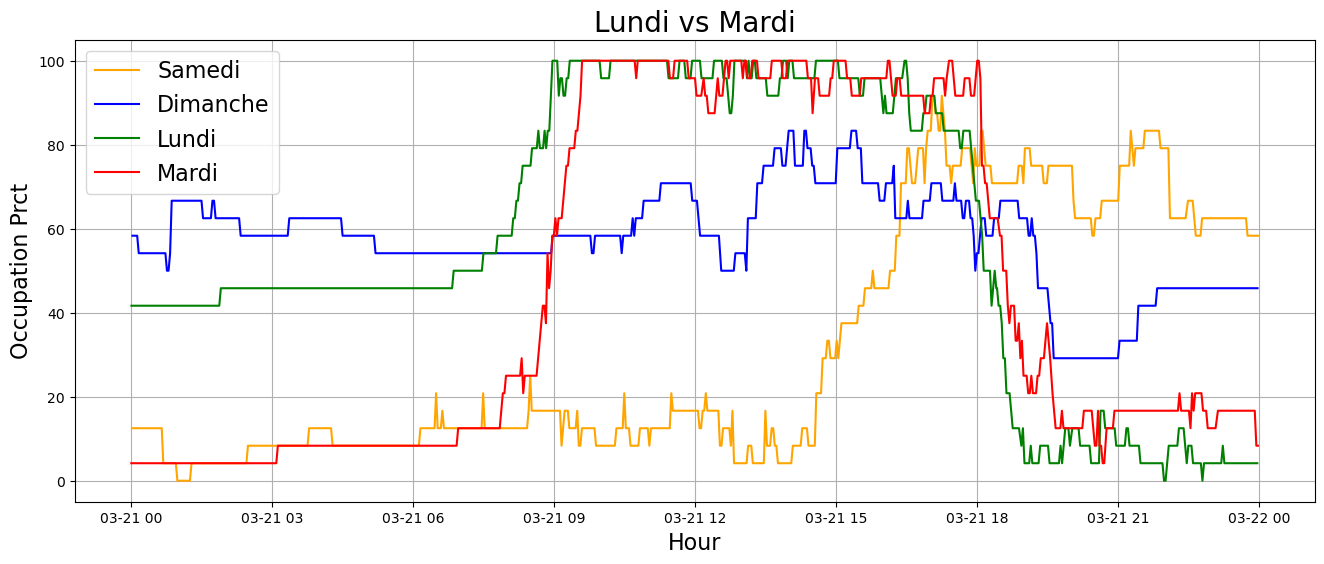

In [216]:
test = preProcessDataframe(getDatasetStation(99886640))

samedi = test[test["jour"] == 18]
samedi["time"] = samedi['time'].apply(lambda dt: dt.replace(day = 21))
samedi = samedi.set_index('time').sort_index()
dimanche = test[test["jour"] == 19]
dimanche["time"] = dimanche['time'].apply(lambda dt: dt.replace(day = 21))
dimanche = dimanche.set_index('time').sort_index()
lundi = test[test["jour"] == 20]
lundi["time"] = lundi['time'].apply(lambda dt: dt.replace(day = 21))
lundi = lundi.set_index('time').sort_index()
mardi = test[test["jour"] == 21].set_index('time').sort_index()

fig = plt.figure(figsize=(16,6))
plt.title(f'Lundi vs Mardi', fontsize=20)
plt.plot(samedi["occupation_prct"], color='orange')
plt.plot(dimanche["occupation_prct"], color='blue')
plt.plot(lundi["occupation_prct"], color='green')
plt.plot(mardi["occupation_prct"], color='red')
plt.xlabel('Hour', fontsize = 16)
plt.ylabel('Occupation Prct', fontsize = 16)
plt.legend(labels=['Samedi', 'Dimanche','Lundi', 'Mardi'], fontsize = 16)
plt.grid()
plt.show()

In [191]:
dfbis = preProcessDataframe(getDatasetStation(128932790)).set_index("time")
feat = ["station_id", "lon", "lat", "jour", "heure", "minute"]
target = ["occupation_prct"]

x = dfbis[feat]
y = dfbis[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train = x_train.sort_index()
y_train = x_train.sort_index()
x_test = x_train.sort_index()
y_test = x_train.sort_index()

In [190]:
y_test.sort_index()

,occupation_prct
time,
2023-03-17 16:30:22,65.517241
2023-03-17 17:21:26,55.172414
2023-03-17 17:25:26,55.172414
2023-03-17 17:31:27,51.724138
2023-03-17 17:35:27,51.724138
...,...
2023-03-21 23:13:43,3.448276
2023-03-21 23:35:45,3.448276
2023-03-21 23:41:45,3.448276


In [217]:
preProcessDataframe(getDatasetStation(99886640))

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,...,name,lat,lon,capacity,occupation_prct,occupation_class,seconds_since_midnight,jour,heure,minute
249210,99886640,21,19.0,2.0,2,1,1,1,1679066901,2023-03-17 16:30:22,...,Place des Victoires,48.866035,2.342033,24,87.500000,3,59422.0,17,16,30
249211,99886640,20,18.0,2.0,3,1,1,1,1679066901,2023-03-17 16:34:22,...,Place des Victoires,48.866035,2.342033,24,83.333333,3,59662.0,17,16,34
249212,99886640,20,18.0,2.0,3,1,1,1,1679066901,2023-03-17 16:57:24,...,Place des Victoires,48.866035,2.342033,24,83.333333,3,61044.0,17,16,57
249213,99886640,19,17.0,2.0,4,1,1,1,1679066901,2023-03-17 16:59:24,...,Place des Victoires,48.866035,2.342033,24,79.166667,3,61164.0,17,16,59
249214,99886640,19,18.0,1.0,4,1,1,1,1679066901,2023-03-17 17:01:24,...,Place des Victoires,48.866035,2.342033,24,79.166667,3,61284.0,17,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829063,99886640,4,3.0,1.0,19,1,1,1,1679438034,2023-03-21 23:50:46,...,Place des Victoires,48.866035,2.342033,24,16.666667,1,NaN,21,23,50
829064,99886640,4,3.0,1.0,19,1,1,1,1679438034,2023-03-21 23:52:46,...,Place des Victoires,48.866035,2.342033,24,16.666667,1,NaN,21,23,52
829065,99886640,4,3.0,1.0,19,1,1,1,1679438034,2023-03-21 23:54:46,...,Place des Victoires,48.866035,2.342033,24,16.666667,1,NaN,21,23,54
829066,99886640,2,1.0,1.0,21,1,1,1,1679438034,2023-03-21 23:56:46,...,Place des Victoires,48.866035,2.342033,24,8.333333,1,NaN,21,23,56
